In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/ukbb-tools/04_gwas/check_gwas/plots/gwas_plot_misc.R')


In [3]:
annot_f <- '/scratch/groups/mrivas/ukbb24983/cal/annotation_20201002/ukb24983_cal_cALL_v2_hg19.vep101-loftee.Csq.tsv.gz'

snpnet_betas_f <- '/scratch/groups/mrivas/projects/PRS/private_output/202009_batch/HC.1-400/HC201/2_refit/snpnet.tsv'


In [4]:
fread(annot_f, select=c('#CHROM', 'POS', 'ID', 'Allele', 'Csq', 'Consequence', 'SYMBOL', 'gnomAD_AF', 'LoF')) %>%
rename('CHROM'='#CHROM') %>%
mutate(CHROM=if_else(CHROM == 'XY', 'X', CHROM)) %>%
compute_gwas_plot_df() -> annot_df


In [19]:
snpnet_betas_f %>% fread() %>% select(-CHROM, -POS) %>% left_join(annot_df, by='ID') -> df



In [34]:
df%>%
mutate(
    SYMBOL = if_else(ID == 'DRB1_103', 'DRB1_103', SYMBOL),
    Csq    = if_else(ID == 'DRB1_103', 'pav', Csq),
    POScum = if_else(ID == 'DRB1_103', 1094272075, POScum)
) %>%
replace_na(list(SYMBOL='', Csq='pav', POScum=1094272075)) %>%
mutate(repel_label = if_else(rank(-abs(BETA)) <= 30, SYMBOL, '')) %>%
plot_lake() + theme(legend.position = c(.8, .6)) -> p_lake


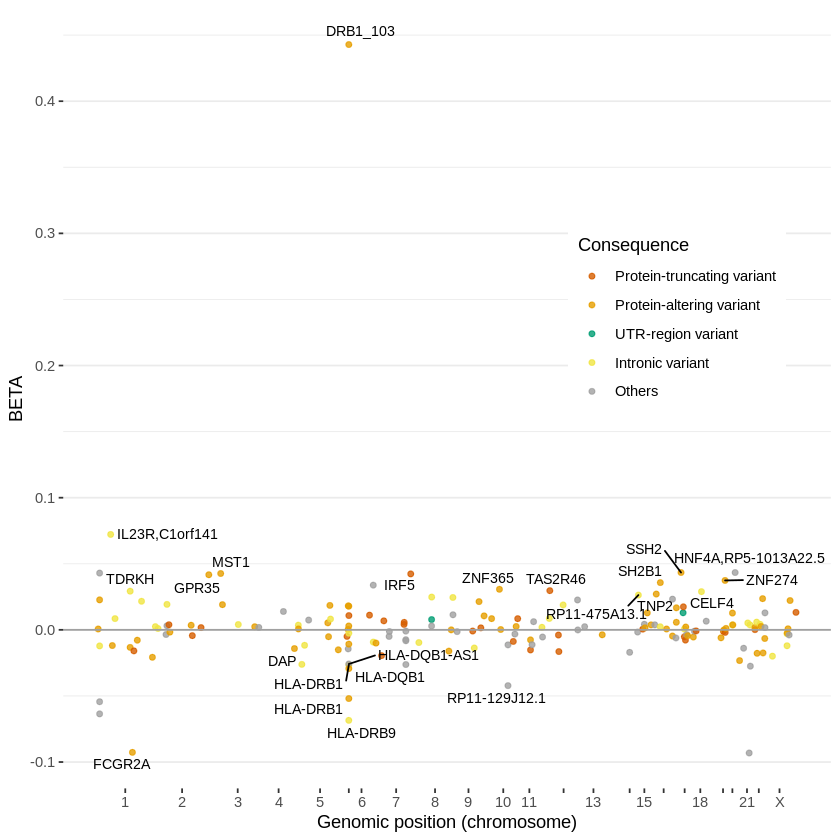

In [35]:
p_lake

In [36]:
ggsave('plots/p_lake.HC201.pdf', p_lake, width=6, height=6)
ggsave('plots/p_lake.HC201.png', p_lake, width=6, height=6)

In [8]:
df %>% arrange(POScum) %>%
arrange(-abs(BETA)) %>%
head(30)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DRB1_103,N,P,0.44285790,NA,NA,NA,NA,NA,NA,NA,NA,NA
rs2836878,G,A,-0.09317168,21,40465534,A,others,regulatory_region_variant,NA,NA,NA,2819972957
rs1801274,A,G,-0.09269249,1,161479745,G,pav,missense_variant,FCGR2A,0.4757000,NA,161479745
rs1004819,G,A,0.07220394,1,67670213,A,intron,intron_variant,"IL23R,C1orf141",NA,NA,67670213
Affx-28475675,A,G,-0.06847643,6,32429594,G,intron,intron_variant,HLA-DRB9,NA,NA,1094154790
rs4654897,T,C,-0.06356878,1,20191436,C,others,intergenic_variant,NA,NA,NA,20191436
rs2314757,C,T,-0.05438379,1,20131771,T,others,intergenic_variant,NA,NA,NA,20131771
Affx-28486470,A,G,-0.05197326,6,32546879,G,pav,missense_variant,HLA-DRB1,0.0004171,NA,1094272075
rs2289629,G,A,0.04337577,17,27959903,A,pav,missense_variant,SSH2,0.2791000,NA,2526290239
